In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
ss = pd.read_csv("F:\\Final Year Project\\Datasets\\01_District_wise_crimes_committed_IPC_2001_2012.csv")
ss.drop(["CULPABLE HOMICIDE NOT AMOUNTING TO MURDER", "CUSTODIAL RAPE", "OTHER RAPE", "KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS", "KIDNAPPING AND ABDUCTION OF OTHERS", "PREPARATION AND ASSEMBLY FOR DACOITY", "BURGLARY", "AUTO THEFT", "OTHER THEFT", "CRIMINAL BREACH OF TRUST", "CHEATING", "COUNTERFIETING", "ARSON", "ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY", "INSULT TO MODESTY OF WOMEN", "CRUELTY BY HUSBAND OR HIS RELATIVES", "IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES", "CAUSING DEATH BY NEGLIGENCE", "OTHER IPC CRIMES","TOTAL IPC CRIMES","RIOTS","DOWRY DEATHS"], axis=1, inplace=True)
ss = ss.loc[ss['DISTRICT']!='TOTAL']
ss.head()

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,RAPE,KIDNAPPING & ABDUCTION,DACOITY,ROBBERY,THEFT,HURT/GREVIOUS HURT
0,ANDHRA PRADESH,ADILABAD,2001,101,60,50,46,9,41,199,1131
1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,23,53,8,16,366,1543
2,ANDHRA PRADESH,CHITTOOR,2001,101,57,27,59,4,14,723,2088
3,ANDHRA PRADESH,CUDDAPAH,2001,80,53,20,25,1,4,173,795
4,ANDHRA PRADESH,EAST GODAVARI,2001,82,67,23,49,4,25,1021,1244


In [3]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
ss["STATE/UT"]=le.fit_transform(ss["STATE/UT"].astype("str"))
ss["STATE/UT"].value_counts()

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
ss["DISTRICT"]=le.fit_transform(ss["DISTRICT"].astype("str"))
ss["DISTRICT"].value_counts()

240    46
547    37
706    37
800    36
604    35
       ..
409     1
690     1
103     1
111     1
20      1
Name: DISTRICT, Length: 807, dtype: int64

In [4]:
from sklearn import preprocessing
ss = preprocessing.scale(ss)
#print(crime_rates_standardized)
ss = pd.DataFrame(ss)

In [5]:
ss.head()

,0,1,2,3,4,5,6,7,8,9,10
0,-1.707827,-1.727553,-1.626846,1.158345,0.350724,0.590080,0.016109,0.187127,0.209883,-0.222528,1.311381
1,-1.707827,-1.620056,-1.626846,2.240488,1.582848,-0.151770,0.085084,0.096065,-0.249926,-0.064060,2.044720
2,-1.707827,-1.078274,-1.626846,1.158345,0.293857,-0.041867,0.144206,-0.268182,-0.286710,0.274701,3.014793
3,-1.707827,-1.000877,-1.626846,0.703845,0.218034,-0.234198,-0.190818,-0.541367,-0.470634,-0.247199,0.713317
4,-1.707827,-0.794484,-1.626846,0.747130,0.483414,-0.151770,0.045670,-0.268182,-0.084395,0.557476,1.512515


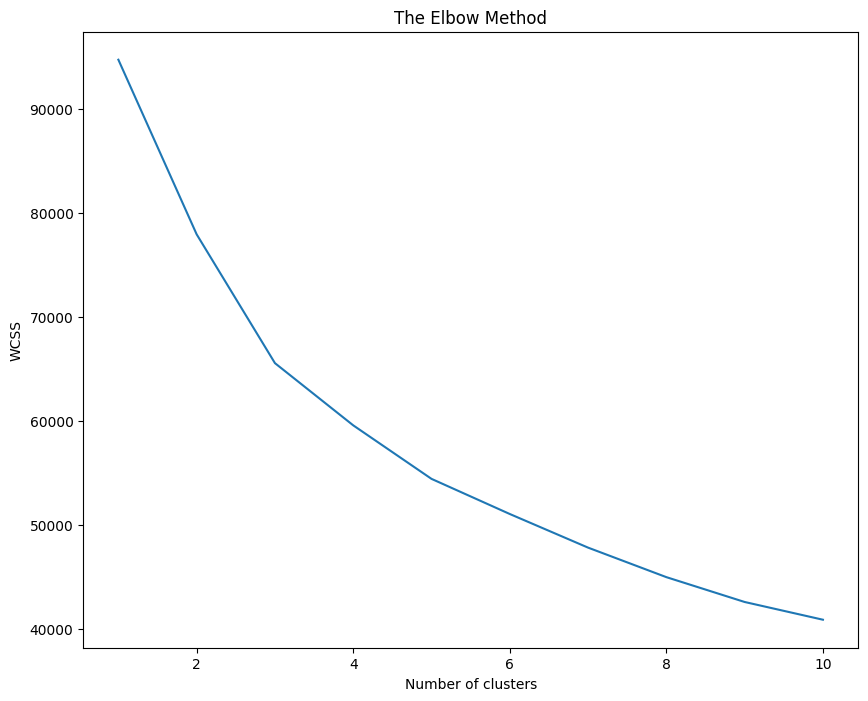

In [6]:
103
%matplotlib inline
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(ss)
    wcss.append(kmeans.inertia_) #criterion based on which K-means clustering works
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [7]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(ss)
y_kmeans

array([2, 2, 2, ..., 0, 0, 0])

In [8]:
import pickle

pickle.dump(kmeans,open('test.pkl','wb'))
rap = pickle.load(open('test.pkl','rb'))

In [9]:
y_kmeans1=y_kmeans+1

# New list called cluster
cluster = list(y_kmeans1)
# Adding cluster to our data set
ss['cluster'] = cluster

In [10]:
kmeans_mean_cluster = pd.DataFrame(round(ss.groupby('cluster').mean(),1))
kmeans_mean_cluster

,0,1,2,3,4,5,6,7,8,9,10
cluster,,,,,,,,,,,
1,0.1,0.0,0.0,-0.3,-0.3,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2
2,-0.9,-0.9,-0.0,10.2,7.5,13.9,20.2,2.3,9.4,17.9,2.6
3,-0.3,-0.1,-0.0,1.3,1.1,0.8,0.6,1.0,0.9,0.6,1.0


In [32]:
ss.loc[ss['cluster']==3].describe()

,0,1,2,3,4,5,6,7,8,9,10,cluster
count,1612.000000,1612.000000,1612.000000,1612.000000,1612.000000,1612.000000,1612.000000,1612.000000,1612.000000,1612.000000,1612.000000,1612.0
mean,-0.268219,-0.089056,-0.020750,1.293922,1.133307,0.823267,0.580651,1.008490,0.901604,0.648453,1.021410,3.0
std,1.133901,1.034652,1.031110,1.148930,1.511470,1.268103,0.900924,1.684546,1.779411,1.428800,1.613601,0.0
min,-1.707827,-1.740452,-1.626846,-0.854442,-0.786621,-0.756241,-0.427305,-0.632429,-0.525811,-0.405667,-0.701743,3.0
25%,-1.414791,-1.001952,-1.049453,0.530702,0.199078,0.068037,-0.013452,-0.177120,0.062744,-0.064534,-0.237176,3.0
50%,-0.242648,-0.020509,0.105331,1.050130,0.786706,0.480176,0.301864,0.551374,0.448984,0.168898,0.556682,3.0
75%,0.929495,0.710466,0.971419,1.764345,1.658671,1.167074,0.826570,1.644115,1.019147,0.742988,1.748358,3.0
max,1.515567,1.720933,1.548811,10.702850,13.259588,14.822609,5.346925,19.310097,20.257547,12.109504,7.907875,3.0


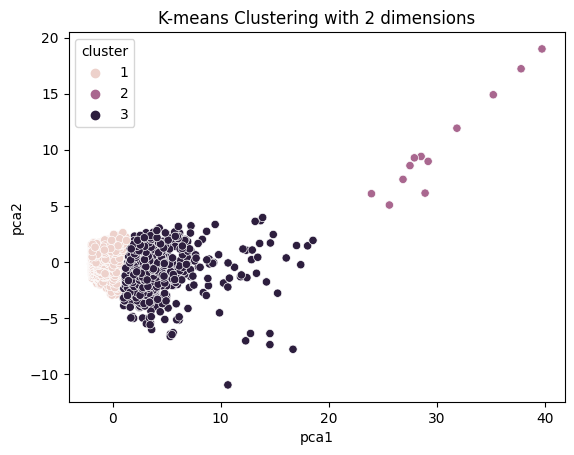

In [12]:
from sklearn.decomposition import PCA
import seaborn as sns

reduced_data = PCA(n_components=2).fit_transform(ss)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])

sns.scatterplot(x="pca1", y="pca2", hue=ss['cluster'], data=results)
plt.title('K-means Clustering with 2 dimensions')
plt.show()

In [55]:
df = pd.read_csv("F:\\Final Year Project\\Datasets\\01_District_wise_crimes_committed_IPC_2001_2012.csv")
df.drop(["CULPABLE HOMICIDE NOT AMOUNTING TO MURDER", "CUSTODIAL RAPE", "OTHER RAPE", "KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS", "KIDNAPPING AND ABDUCTION OF OTHERS", "PREPARATION AND ASSEMBLY FOR DACOITY", "BURGLARY", "AUTO THEFT", "OTHER THEFT", "CRIMINAL BREACH OF TRUST", "CHEATING", "COUNTERFIETING", "ARSON", "ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY", "INSULT TO MODESTY OF WOMEN", "CRUELTY BY HUSBAND OR HIS RELATIVES", "IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES", "CAUSING DEATH BY NEGLIGENCE", "OTHER IPC CRIMES","TOTAL IPC CRIMES","RIOTS","DOWRY DEATHS"], axis=1, inplace=True)
df = df.loc[df['DISTRICT']!='TOTAL']

In [56]:
df2 = pd.DataFrame([["ANDHRA PRADESH","ADILABAD",2006.9	,95.0,	90.2,	60.1,	111.9,	12.2,	87.9,	1591.5	,1364.5]], columns=["STATE/UT","DISTRICT","YEAR","MURDER","ATTEMPT TO MURDER","RAPE","KIDNAPPING & ABDUCTION","DACOITY","ROBBERY","THEFT","HURT/GREVIOUS HURT"])
df = pd.concat([df2, df])

In [42]:
df.head()

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,RAPE,KIDNAPPING & ABDUCTION,DACOITY,ROBBERY,THEFT,HURT/GREVIOUS HURT
0,ANDHRA PRADESH,ADILABAD,2012.0,341.0,741.0,369.0,497.0,112.0,312.0,1549.0,1682.0
0,ANDHRA PRADESH,ADILABAD,2001.0,101.0,60.0,50.0,46.0,9.0,41.0,199.0,1131.0
1,ANDHRA PRADESH,ANANTAPUR,2001.0,151.0,125.0,23.0,53.0,8.0,16.0,366.0,1543.0
2,ANDHRA PRADESH,CHITTOOR,2001.0,101.0,57.0,27.0,59.0,4.0,14.0,723.0,2088.0
3,ANDHRA PRADESH,CUDDAPAH,2001.0,80.0,53.0,20.0,25.0,1.0,4.0,173.0,795.0


In [57]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["STATE/UT"]=le.fit_transform(df["STATE/UT"].astype("str"))
df["STATE/UT"].value_counts()

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["DISTRICT"]=le.fit_transform(df["DISTRICT"].astype("str"))
df["DISTRICT"].value_counts()

from sklearn import preprocessing
df = preprocessing.scale(df)
#print(crime_rates_standardized)
df = pd.DataFrame(df)

In [44]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,-1.707438,-1.727153,1.548506,6.337430,13.125484,9.307176,4.454696,9.515495,5.185790,1.058370,2.291301
1,-1.707438,-1.727153,-1.626893,1.154971,0.345693,0.586057,0.015574,0.185046,0.208965,-0.222649,1.310791
2,-1.707438,-1.619669,-1.626893,2.234650,1.565497,-0.152095,0.084474,0.094459,-0.250152,-0.064182,2.043949
3,-1.707438,-1.077949,-1.626893,1.154971,0.289394,-0.042739,0.143531,-0.267889,-0.286881,0.274576,3.013782
4,-1.707438,-1.000561,-1.626893,0.701505,0.214329,-0.234111,-0.191126,-0.539650,-0.470528,-0.247320,0.712875


In [58]:
final_features = np.array(df.head(1))
y_pred = rap.predict(final_features)
if y_pred[0] == 0:         
    label="Low Crime Rate Area"
elif y_pred[0] == 1:
    label="High Crime Rate Area"
elif y_pred[0] == 2:
    label = "Moderate Crime Rate Area"
print(label)

Moderate Crime Rate Area


In [9]:
features = [1,1,2025,346,	310,	291,	953,	37,	511,	4025,	3912]

In [10]:
df = pd.read_csv("Datasets/01_District_wise_crimes_committed_IPC_2001_2012.csv")
df.drop(["CULPABLE HOMICIDE NOT AMOUNTING TO MURDER", "CUSTODIAL RAPE", "OTHER RAPE", "KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS", "KIDNAPPING AND ABDUCTION OF OTHERS", "PREPARATION AND ASSEMBLY FOR DACOITY", "BURGLARY", "AUTO THEFT", "OTHER THEFT", "CRIMINAL BREACH OF TRUST", "CHEATING", "COUNTERFIETING", "ARSON", "ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY", "INSULT TO MODESTY OF WOMEN", "CRUELTY BY HUSBAND OR HIS RELATIVES", "IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES", "CAUSING DEATH BY NEGLIGENCE", "OTHER IPC CRIMES","TOTAL IPC CRIMES","RIOTS","DOWRY DEATHS"], axis=1, inplace=True)
df = df.loc[df['DISTRICT']!='TOTAL']
df2 = pd.DataFrame([features], columns=["STATE/UT","DISTRICT","YEAR","MURDER","ATTEMPT TO MURDER","RAPE","KIDNAPPING & ABDUCTION","DACOITY","ROBBERY","THEFT","HURT/GREVIOUS HURT"])
df = pd.concat([df2, df])

In [11]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["STATE/UT"]=le.fit_transform(df["STATE/UT"].astype("str"))
df["STATE/UT"].value_counts()

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["DISTRICT"]=le.fit_transform(df["DISTRICT"].astype("str"))
df["DISTRICT"].value_counts()

241    46
548    37
707    37
801    36
605    35
       ..
267     1
243     1
58      1
397     1
0       1
Name: DISTRICT, Length: 808, dtype: int64

In [13]:
features = pd.DataFrame(df.head(1))
y_pred = rdcls.predict(features)
if y_pred[0] == 0:         
    label="Moderate Crime Rate Area"
elif y_pred[0] == 1:
    label="Low Crime Rate Area"
elif y_pred[0] == 2:
    label = "High Crime Rate Area"